> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1036]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [1037]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [1083]:
# check last rows
df.tail(5)

Gender Scheduled_Day Appointment_Day  Days_inbetween  Age  \
110522      F    2016-06-07      2016-06-07               0   56   
110523      F    2016-06-07      2016-06-07               0   51   
110524      F    2016-06-07      2016-06-07               0   21   
110525      F    2016-06-07      2016-06-07               0   38   
110526      F    2016-06-07      2016-06-07               0   54   

           age_group Neighbourhood  Scholarship  Hipertension  Diabetes  \
110522  56 and above   MARIA ORTIZ            0             0         0   
110523         38-55   MARIA ORTIZ            0             0         0   
110524         19-37   MARIA ORTIZ            0             0         0   
110525         38-55   MARIA ORTIZ            0             0         0   
110526         38-55   MARIA ORTIZ            0             0         0   

        Alcoholism  Handcap  SMS_received  No_show  
110522           0        0             1        0  
110523           0        0             1        0  
110524           0        0             1        0  
110525           0        0             1        0  
110526           0        0             1        0

In [1039]:
# shape of df
df.shape

(110527, 14)

In [1040]:
# data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [1084]:
# number of unique values for each column 
df.nunique()

Gender               2
Scheduled_Day       27
Appointment_Day     27
Days_inbetween       1
Age                103
age_group            4
Neighbourhood       81
Scholarship          2
Hipertension         2
Diabetes             2
Alcoholism           2
Handcap              2
SMS_received         2
No_show              2
dtype: int64

PatientId          62299  AND AppointmentID     110527 ,                             
this means many many patients had more than one appointments ,               
AND this CSV is about 27 Days 

In [1042]:
#first day 
df['AppointmentDay'].min()

'2016-04-29T00:00:00Z'

In [1043]:
#last day
df['AppointmentDay'].max()

'2016-06-08T00:00:00Z'

In [1044]:
#then some days aren't mentioned

In [1045]:
# check for lost parts
df.isnull().sum()
# as you see no data entry is missed 

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [1046]:
# check for duplicated inputs
duplicates = df.duplicated()
duplicates.sum()
# as you see no duplicates

0

In [1047]:
df.describe()
# to describe the CSV

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

age has some issues like max is 115 and min is -1 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [1086]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [1087]:
df.head(0)

Empty DataFrame
Columns: [Gender, Scheduled_Day, Appointment_Day, Days_inbetween, Age, age_group, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No_show]
Index: []

In [1049]:
#removing irrelevant columns which we won't use 
df.drop(['PatientId', 'AppointmentID'],axis = 1 , inplace=True)


In [1050]:
df.head(0)
#NEW LABELS

Empty DataFrame
Columns: [Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []

In [1088]:
#Renaming Labels
def mod_string(col):
    """modifies a given string"""
    if 'Day' in col:  # ScheduledDay, AppointmentDay
        col = (col[:-3] + '_' + col[-3:])  # split the name and put _ 
    if 'No-show' in col :
        col = 'No_show'
    return col
df.rename(columns = lambda x: mod_string(x),inplace=True)
df.head(0)

Empty DataFrame
Columns: [Gender, Scheduled__Day, Appointment__Day, Days_inbetw_een, Age, age_group, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No_show]
Index: []

fixing data in AGE

In [1052]:
# find negative values in age
Error = df.query('Age < 0')
Error

Gender         Scheduled_Day       Appointment_Day  Age Neighbourhood  \
99832      F  2016-06-06T08:58:13Z  2016-06-06T00:00:00Z   -1         ROMÃO   

       Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
99832            0             0         0           0        0             0   

      No_show  
99832      No

In [1053]:
#deleting that error
df.drop(99832, axis = 0 ,inplace=True)


In [1089]:
Error = df.query('Age < 0')
Error
# NO MORE ERRORS IN AGE

Empty DataFrame
Columns: [Gender, Scheduled__Day, Appointment__Day, Days_inbetw_een, Age, age_group, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No_show]
Index: []

Fix data types
convert object to datetime and keep only the date : scheduled_day ,appointment_day


In [1055]:
# convert string to datetime and keep only the date
Data = ['Scheduled_Day', 'Appointment_Day']
for col in Data:
    df[col] = pd.to_datetime(pd.to_datetime(df[column]).dt.date)
df.dtypes

Gender                     object
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hipertension                int64
Diabetes                    int64
Alcoholism                  int64
Handcap                     int64
SMS_received                int64
No_show                    object
dtype: object

In [1056]:
df.head()

Gender Scheduled_Day Appointment_Day  Age      Neighbourhood  Scholarship  \
0      F    2016-04-29      2016-04-29   62    JARDIM DA PENHA            0   
1      M    2016-04-29      2016-04-29   56    JARDIM DA PENHA            0   
2      F    2016-04-29      2016-04-29   62      MATA DA PRAIA            0   
3      F    2016-04-29      2016-04-29    8  PONTAL DE CAMBURI            0   
4      F    2016-04-29      2016-04-29   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No_show  
0             1         0           0        0             0      No  
1             0         0           0        0             0      No  
2             0         0           0        0             0      No  
3             0         0           0        0             0      No  
4             1         1           0        0             0      No

In [1090]:
df.dtypes
# Error fixed 

Gender                      object
Scheduled__Day      datetime64[ns]
Appointment__Day    datetime64[ns]
Days_inbetw_een              int64
Age                          int64
age_group                 category
Neighbourhood               object
Scholarship                  int64
Hipertension                 int64
Diabetes                     int64
Alcoholism                   int64
Handcap                      int64
SMS_received                 int64
No_show                      int64
dtype: object

In [1058]:
df.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

we don't need to know how many handicaps 


In [1059]:
df.Handcap = np.where(df['Handcap'] >= 1, 1,0)


In [1060]:
df.Handcap.value_counts()

0    108285
1      2241
Name: Handcap, dtype: int64

In [1061]:
#No_show column contains YES AND NO instead of yes= 1 and No = 0 

In [1062]:
df.No_show.value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

In [1063]:
df.No_show = np.where(df.No_show == "Yes", 1, 0)

In [1064]:
df.No_show.value_counts()
#already changed to zeros and ones

0    88207
1    22319
Name: No_show, dtype: int64

In [1065]:
df.head()

Gender Scheduled_Day Appointment_Day  Age      Neighbourhood  Scholarship  \
0      F    2016-04-29      2016-04-29   62    JARDIM DA PENHA            0   
1      M    2016-04-29      2016-04-29   56    JARDIM DA PENHA            0   
2      F    2016-04-29      2016-04-29   62      MATA DA PRAIA            0   
3      F    2016-04-29      2016-04-29    8  PONTAL DE CAMBURI            0   
4      F    2016-04-29      2016-04-29   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No_show  
0             1         0           0        0             0        0  
1             0         0           0        0             0        0  
2             0         0           0        0             0        0  
3             0         0           0        0             0        0  
4             1         1           0        0             0        0

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

gender column

In [1066]:
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

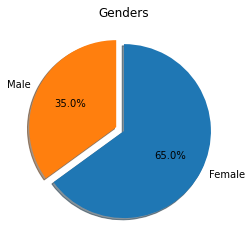

In [1067]:
sorted_counts = df.Gender.value_counts()
explode = (0, 0.1)
plt.pie(sorted_counts, labels = ['Female', 'Male'], startangle = 90,
        explode=explode,shadow=True,counterclock = False, autopct='%1.1f%%');
plt.title('Genders');

no_show column

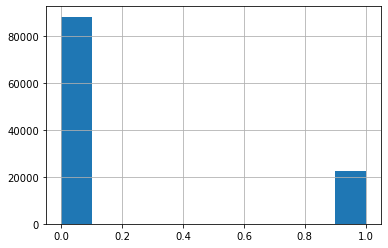

In [1068]:
df['No_show'].hist();
#Most showed up 

Text(0.5, 1.0, 'Histogram Age')

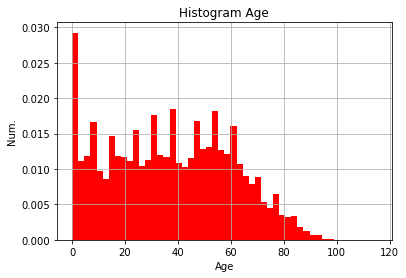

In [1069]:
df['Age'].hist(facecolor='r',bins=50,density=True);
plt.xlabel('Age')
plt.ylabel('Num.')
plt.title('Histogram Age')

# Most patients are young

scholarship column


<AxesSubplot:>

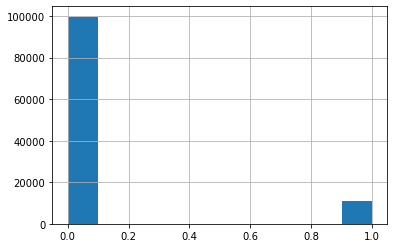

In [1070]:
df['Scholarship'].hist()
# Most patients had no scholarship

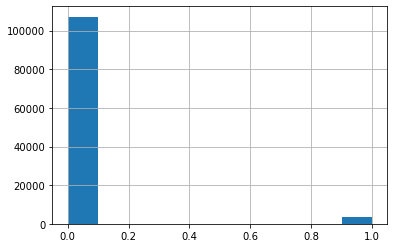

In [1071]:
df['Alcoholism'].hist();

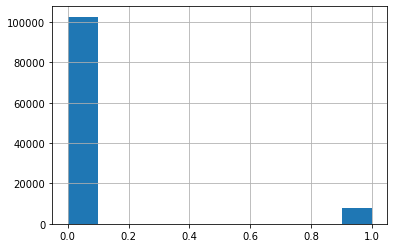

In [1072]:
df['Diabetes'].hist();

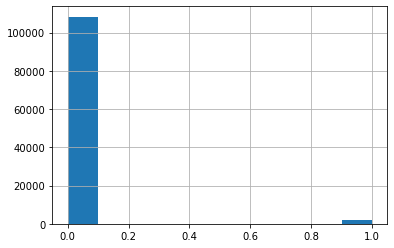

In [1073]:
df['Handcap'].hist();

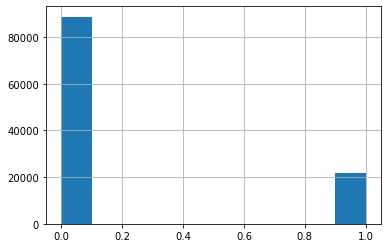

In [1074]:
df['Hipertension'].hist();

In [1075]:
df.head()

Gender Scheduled_Day Appointment_Day  Age      Neighbourhood  Scholarship  \
0      F    2016-04-29      2016-04-29   62    JARDIM DA PENHA            0   
1      M    2016-04-29      2016-04-29   56    JARDIM DA PENHA            0   
2      F    2016-04-29      2016-04-29   62      MATA DA PRAIA            0   
3      F    2016-04-29      2016-04-29    8  PONTAL DE CAMBURI            0   
4      F    2016-04-29      2016-04-29   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No_show  
0             1         0           0        0             0        0  
1             0         0           0        0             0        0  
2             0         0           0        0             0        0  
3             0         0           0        0             0        0  
4             1         1           0        0             0        0

Most patients didn't suffer from alcoholism, diabetes, hypertension, or handicap.

In [1076]:
# calculate days between scheduled_day and appointment_day
Days_inbetween = (df['Appointment_Day'] - df['Scheduled_Day']).dt.days
# insert a new column (days_between) before column 3
df.insert(3, 'Days_inbetween', Days_inbetween)
df.head()

Gender Scheduled_Day Appointment_Day  Days_inbetween  Age  \
0      F    2016-04-29      2016-04-29               0   62   
1      M    2016-04-29      2016-04-29               0   56   
2      F    2016-04-29      2016-04-29               0   62   
3      F    2016-04-29      2016-04-29               0    8   
4      F    2016-04-29      2016-04-29               0   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received  No_show  
0        0             0        0  
1        0             0        0  
2        0             0        0  
3        0             0        0  
4        0             0        0

In [1077]:
# make sure there are no negative values
negative = df.query('Days_inbetween < 0')
negative

Empty DataFrame
Columns: [Gender, Scheduled_Day, Appointment_Day, Days_inbetween, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No_show]
Index: []

no negative days

make age in four groups 

In [1078]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [1079]:
edges = [0, 18, 37, 55, 115]
names = ['0-18','19-37','38-55','56 and above']
age_group = pd.cut(df['Age'], edges, labels=names)
df.insert(5, 'age_group', age_group)
df.head()

Gender Scheduled_Day Appointment_Day  Days_inbetween  Age     age_group  \
0      F    2016-04-29      2016-04-29               0   62  56 and above   
1      M    2016-04-29      2016-04-29               0   56  56 and above   
2      F    2016-04-29      2016-04-29               0   62  56 and above   
3      F    2016-04-29      2016-04-29               0    8          0-18   
4      F    2016-04-29      2016-04-29               0   56  56 and above   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received  No_show  
0        0             0        0  
1        0             0        0  
2        0             0        0  
3        0             0        0  
4        0             0        0

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Can the age be used to predict if a patient will show up for their appointment?)

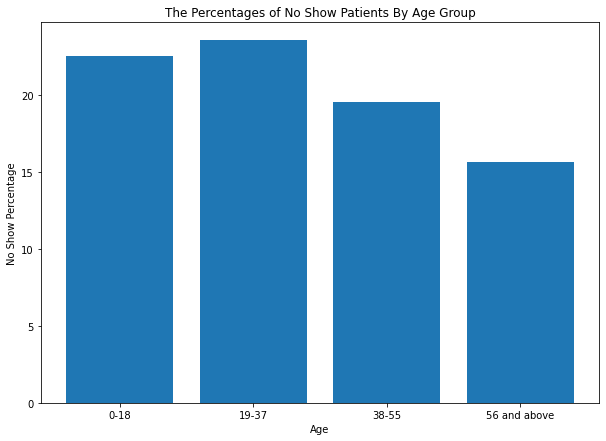

In [1080]:
# percentages of no show patients based on age group
no_show_perc_age = df.groupby('age_group').No_show.mean() * 100
plt.figure(figsize = [10, 7])
plt.bar(x = no_show_perc_age.index, height = no_show_perc_age)
plt.title('The Percentages of No Show Patients By Age Group')
plt.xlabel('Age')
plt.ylabel('No Show Percentage');

(56 and above) were the most committed to showing up for their appointments
the older the person is the more likely he is going to show up

### Research Question 2  (Can a scholarship affect if a patient will show up for their scheduled appointment?)

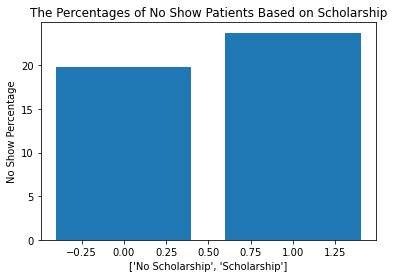

In [1081]:
# percentages of no show patients based on scholarship
no_show_perc_scholarship = df.groupby('Scholarship').No_show.mean() * 100
plt.bar(x = no_show_perc_scholarship.index, height = no_show_perc_scholarship)
plt.title('The Percentages of No Show Patients Based on Scholarship')
plt.xlabel(['No Scholarship', 'Scholarship'])
plt.ylabel('No Show Percentage');

having a scholarship could help us to predict if a patient will show up for their scheduled appointment.
mostly the scholarship make person shows up 

In [1082]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

-the younger the patient is the more likely he/she is going to miss the appointment.             
-it seems like a patient with a scholarship is more likely to not show up for the appointment.

# Most patients:
Were females.

Were young.

Didn't have a scholarship.

Q: Can the gender be considered as a factor to predict if a patient will show up for their scheduled appointment?
The percentages of no show patients based on gender were pretty close. So, we can say that the gender can't be considered as a factor to predict if a patient will show up for their scheduled appointment.


Q: Can the age be considered as a factor to predict if a patient will show up for their scheduled appointment?
Yes, the younger the patient is the more likely he/she is going to miss the appointment. Except the group (0-18) since they probably are accompanied by an adult.

In [ ]:

Q: Can having a scholarship be considered as a factor to predict if a patient will show up for their scheduled appointment?
Yes, it seems like a patient with a scholarship is more likely to not show up for the appointment.